## alpha vantage doesn't have index data, also no option data for index option

In [1]:
import requests
import pandas as pd
API_KEY = 'PX1Y08UW8LCATEG2'
date='2025-07-24'
symbol = 'AAPL'  # Example symbol, you can change it to any valid stock symbol
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=HISTORICAL_OPTIONS&symbol={symbol}&date={date}&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

print(data)

{'endpoint': 'Historical Options', 'message': 'success', 'data': [{'contractID': 'AAPL250725C00110000', 'symbol': 'AAPL', 'expiration': '2025-07-25', 'strike': '110.00', 'type': 'call', 'last': '104.92', 'mark': '103.75', 'bid': '103.25', 'bid_size': '109', 'ask': '104.25', 'ask_size': '24', 'volume': '40', 'open_interest': '61', 'date': '2025-07-24', 'implied_volatility': '0.01976', 'delta': '1.00000', 'gamma': '0.00000', 'theta': '-0.01305', 'vega': '0.00000', 'rho': '0.00301'}, {'contractID': 'AAPL250725P00110000', 'symbol': 'AAPL', 'expiration': '2025-07-25', 'strike': '110.00', 'type': 'put', 'last': '0.01', 'mark': '0.01', 'bid': '0.00', 'bid_size': '0', 'ask': '0.01', 'ask_size': '1000', 'volume': '5', 'open_interest': '111', 'date': '2025-07-24', 'implied_volatility': '4.13673', 'delta': '-0.00074', 'gamma': '0.00006', 'theta': '-0.05933', 'vega': '0.00029', 'rho': '-0.00000'}, {'contractID': 'AAPL250725C00120000', 'symbol': 'AAPL', 'expiration': '2025-07-25', 'strike': '120.00

## yahoo finance have option data

### method 1: start from the stock ticker

In [66]:
import yfinance as yf
stock_ticker = yf.Ticker("^SPX")

In [22]:
expiration_dates = stock_ticker.options
option_chain_data = stock_ticker.option_chain(expiration_dates[0]) # Replace 0 with the desired expiration date index


In [24]:
expiration_dates

('2025-08-11',
 '2025-08-12',
 '2025-08-13',
 '2025-08-14',
 '2025-08-15',
 '2025-08-18',
 '2025-08-19',
 '2025-08-20',
 '2025-08-21',
 '2025-08-22',
 '2025-08-25',
 '2025-08-26',
 '2025-08-27',
 '2025-08-28',
 '2025-08-29',
 '2025-09-02',
 '2025-09-03',
 '2025-09-04',
 '2025-09-05',
 '2025-09-08',
 '2025-09-09',
 '2025-09-12',
 '2025-09-15',
 '2025-09-19',
 '2025-09-26',
 '2025-09-30',
 '2025-10-17',
 '2025-10-31',
 '2025-11-21',
 '2025-11-28',
 '2025-12-19',
 '2025-12-31',
 '2026-01-16',
 '2026-01-30',
 '2026-02-20',
 '2026-03-20',
 '2026-03-31',
 '2026-04-17',
 '2026-05-15',
 '2026-06-18',
 '2026-06-30',
 '2026-07-17',
 '2026-08-21',
 '2026-09-18',
 '2026-12-18',
 '2027-06-17',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21',
 '2030-12-20')

In [23]:
option_chain_data.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250811C04400000,2025-08-08 18:59:10+00:00,4400.0,1992.90,1987.7,2011.60,78.430050,4.096698,1.0,4,2.123784,True,REGULAR,USD
1,SPXW250811C04800000,2025-08-08 02:16:51+00:00,4800.0,1575.40,1587.8,1611.60,32.109985,2.080619,3.0,1,1.691469,True,REGULAR,USD
2,SPXW250811C05725000,2025-08-01 14:51:24+00:00,5725.0,523.70,663.3,686.90,0.000000,0.000000,1.0,1,0.773043,True,REGULAR,USD
3,SPXW250811C05875000,2025-08-04 13:36:03+00:00,5875.0,421.76,513.2,537.40,0.000000,0.000000,1.0,1,0.628178,True,REGULAR,USD
4,SPXW250811C05900000,2025-07-14 19:48:36+00:00,5900.0,403.56,500.9,502.00,0.000000,0.000000,NaN,20,0.617939,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,SPXW250811C06825000,2025-07-30 19:32:09+00:00,6825.0,0.10,0.0,0.05,0.000000,0.000000,NaN,3,0.240242,False,REGULAR,USD
114,SPXW250811C06900000,2025-07-31 19:54:45+00:00,6900.0,0.05,0.0,0.05,0.000000,0.000000,1.0,10,0.276374,False,REGULAR,USD
115,SPXW250811C07000000,2025-07-29 14:02:03+00:00,7000.0,0.05,0.0,0.05,0.000000,0.000000,1.0,8,0.323249,False,REGULAR,USD
116,SPXW250811C07400000,2025-07-16 15:07:44+00:00,7400.0,0.10,0.0,0.05,0.000000,0.000000,NaN,2,0.500005,False,REGULAR,USD


In [25]:
option_chain_data.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250811P02600000,2025-07-16 15:45:46+00:00,2600.0,0.08,0.0,0.05,0.00,0.000000,2.0,29,2.671878,False,REGULAR,USD
1,SPXW250811P02800000,2025-07-18 17:58:42+00:00,2800.0,0.05,0.0,0.05,0.00,0.000000,1.0,26,2.468754,False,REGULAR,USD
2,SPXW250811P03000000,2025-07-22 19:56:56+00:00,3000.0,0.05,0.0,0.05,0.00,0.000000,10.0,72,2.265629,False,REGULAR,USD
3,SPXW250811P03200000,2025-07-18 17:58:32+00:00,3200.0,0.10,0.0,0.05,0.00,0.000000,NaN,36,2.078130,False,REGULAR,USD
4,SPXW250811P03600000,2025-07-31 19:51:37+00:00,3600.0,0.05,0.0,0.05,0.00,0.000000,2.0,31,1.734376,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,SPXW250811P06500000,2025-08-08 18:57:11+00:00,6500.0,107.79,91.7,108.70,-7.68,-6.651078,20.0,2,0.000010,True,REGULAR,USD
133,SPXW250811P06600000,2025-07-16 16:28:57+00:00,6600.0,347.55,185.3,212.30,0.00,0.000000,NaN,2,0.200508,True,REGULAR,USD
134,SPXW250811P06775000,2025-08-08 14:16:27+00:00,6775.0,395.90,363.6,387.80,-122.66,-23.653967,1.0,1,0.340461,True,REGULAR,USD
135,SPXW250811P06800000,2025-07-09 13:36:57+00:00,6800.0,520.90,385.2,412.80,0.00,0.000000,NaN,1,0.358100,True,REGULAR,USD


In [26]:
option_chain_data.underlying

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'INDEX',
 'typeDisp': 'Index',
 'quoteSourceName': 'Delayed Quote',
 'triggerable': True,
 'customPriceAlertConfidence': 'HIGH',
 'corporateActions': [],
 'regularMarketTime': 1754686231,
 'marketState': 'CLOSED',
 'currency': 'USD',
 'regularMarketPrice': 6389.45,
 'underlyingSymbol': '^GSPC',
 'exchange': 'WCB',
 'messageBoardId': 'finmb_INDEXSPX',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'gmtOffSetMilliseconds': -14400000,
 'market': 'us_market',
 'esgPopulated': False,
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'regularMarketChangePercent': 0.77997154,
 'hasPrePostMarketData': False,
 'firstTradeDateMilliseconds': -1325583000000,
 'priceHint': 2,
 'regularMarketChange': 49.450195,
 'regularMarketDayHigh': 6395.16,
 'regularMarketDayRange': '6355.22 - 6395.16',
 'regularMarketDayLow': 6355.22,
 'regularMarketVolume': 2819990494,
 'regularMarketPreviousClose': 6340.0,
 'b

In [13]:
option_chain_data

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   AAPL250815C00090000 2025-08-08 16:12:43+00:00    90.0     140.35  138.90   
1   AAPL250815C00095000 2025-08-01 14:22:07+00:00    95.0     135.65  133.55   
2   AAPL250815C00100000 2025-08-08 18:42:39+00:00   100.0     129.80  128.90   
3   AAPL250815C00105000 2025-08-08 16:12:43+00:00   105.0     125.25  123.75   
4   AAPL250815C00110000 2025-08-08 18:42:39+00:00   110.0     119.80  118.75   
..                  ...                       ...     ...        ...     ...   
61  AAPL250815C00350000 2025-08-05 19:31:39+00:00   350.0       0.01    0.00   
62  AAPL250815C00360000 2025-08-08 17:05:26+00:00   360.0       0.01    0.00   
63  AAPL250815C00370000 2025-06-25 15:29:30+00:00   370.0       0.01    0.00   
64  AAPL250815C00380000 2025-06-16 17:39:46+00:00   380.0       0.01    0.00   
65  AAPL250815C00390000 2025-08-08 17:40:11+00:00   390.0       0.01    0.00   

       ask     change  pe

### method 2, directly use the option ticker

In [32]:
op = yf.Ticker('SPXW250811C06400000')
op.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-09 00:00:00-04:00,39.700001,39.700001,39.700001,39.700001,0,0.0,0.0
2025-07-10 00:00:00-04:00,42.099998,49.880001,42.099998,49.880001,12,0.0,0.0
2025-07-11 00:00:00-04:00,41.849998,41.849998,39.220001,41.400002,0,0.0,0.0
2025-07-14 00:00:00-04:00,34.720001,40.799999,34.720001,40.799999,0,0.0,0.0
2025-07-15 00:00:00-04:00,46.820000,46.820000,35.369999,35.639999,0,0.0,0.0
2025-07-16 00:00:00-04:00,34.349998,34.700001,33.220001,34.360001,17,0.0,0.0
2025-07-17 00:00:00-04:00,38.599998,45.560001,37.830002,43.709999,0,0.0,0.0
2025-07-18 00:00:00-04:00,41.759998,41.759998,37.639999,38.369999,141,0.0,0.0
2025-07-21 00:00:00-04:00,41.400002,48.580002,38.730000,38.730000,0,0.0,0.0


## ivolatility (bought )

### SPX price on 04/11/2019: 2888.32

In [ ]:
import pandas as pd
pd.options.display.max_columns = 99
pd.options.display.max_rows = 99
pd.options.display.max_colwidth = 100

In [1]:
# apiKey = "Csm3Y5qMFr0fYcTU"
apiKey = "66yj4OLE9lVm4lvg"

In [2]:
import ivolatility as ivol
ivol.setLoginParams(apiKey=apiKey)


In [34]:
getOptionsChain = ivol.setMethod('/equities/eod/option-series-on-date')
cur_price = 2888
offset  = 50
strike_from = cur_price - offset
strike_to = cur_price + offset
optionsChain = getOptionsChain(symbol='SPX', 
                               expFrom='2019-04-11', expTo='2019-12-31',
                               strikeFrom=strike_from, strikeTo=strike_to, 
                            #    callPut='C',
                               date='2019-04-11'
                               )
print(optionsChain.shape)

(1168, 5)


In [35]:
optionsChain.head()

,OptionSymbol,callPut,strike,expirationDate,optionId
0,SPXW 190412C02840000,C,2840.0,2019-04-12,104293219
1,SPXW 190412P02840000,P,2840.0,2019-04-12,104293220
2,SPXW 190412C02845000,C,2845.0,2019-04-12,104293221
3,SPXW 190412P02845000,P,2845.0,2019-04-12,104293222
4,SPXW 190412C02850000,C,2850.0,2019-04-12,104293223


In [ ]:
import pandas as pd
pd.options.display.max_rows = 299
pd.options.display.max_columns = 50

In [17]:
cur_price = 2888
offset  = 50
strikes  = [ strike  for strike in   optionsChain['strike'].unique() if (cur_price - offset) < strike < (cur_price + offset)]
print(strikes)

[2840.0, 2845.0, 2850.0, 2855.0, 2860.0, 2865.0, 2870.0, 2875.0, 2880.0, 2885.0, 2890.0, 2895.0, 2900.0, 2905.0, 2910.0, 2915.0, 2920.0, 2925.0, 2930.0, 2935.0]


In [8]:
optionsChain['strike'].min(), optionsChain['strike'].max(), optionsChain['strike'].mean()

(300.0, 4200.0, 2365.734754376059)

In [21]:
optionsChain.sort_values(by='strike', ascending=True, inplace=True)
optionsChain.head()

,OptionSymbol,callPut,strike,expirationDate,optionId
0,SPXW 190412C02840000,C,2840.0,2019-04-12,104293219
320,SPXW 190429C02840000,C,2840.0,2019-04-29,104861293
920,SPXW 190628C02840000,C,2840.0,2019-06-28,104029145
921,SPXW 190628P02840000,P,2840.0,2019-06-28,104029146
281,SPXW 190426P02840000,P,2840.0,2019-04-26,104481834


In [ ]:
# getMarketData = ivol.setMethod('/futures/eod/options-nbbo')
# marketData = getMarketData(symbol='ES', date='2021-12-16')
# marketData = getMarketData(symbol='ES', from_='2021-12-10', to='2021-12-17')


In [17]:
optionsChain.query("strike == 250")

,OptionSymbol,callPut,strike,expirationDate,optionId
0,TSLA 250718C00250000,C,250.0,2025-07-18,136017641
21,TSLA 250725C00250000,C,250.0,2025-07-25,139275587
42,TSLA 250801C00250000,C,250.0,2025-08-01,139383685
56,TSLA 250808C00250000,C,250.0,2025-08-08,139678903
67,TSLA 250815C00250000,C,250.0,2025-08-15,133855009
78,TSLA 250822C00250000,C,250.0,2025-08-22,139739081
89,TSLA 250829C00250000,C,250.0,2025-08-29,139833847
100,TSLA 250919C00250000,C,250.0,2025-09-19,127995165


In [ ]:
allData = pd.DataFrame()


In [ ]:
sym = optionsChain.iloc[0]['OptionSymbol']
getMarketData = ivol.setMethod('/equities/eod/single-stock-option')
marketData = getMarketData(symbol=sym, from_='2019-04-11', to='2019-04-11')
# marketData = getMarketData(symbol="TSLA  250718C00250000", from_='2025-07-01', to='2025-08-05')
# marketData

# for optionSymbol in optionsChain['OptionSymbol']:
#   print(optionSymbol+"---")
#   marketData = getMarketData(symbol=optionSymbol, from_='2025-03-01', to='2025-08-05')
#   allData = pd.concat([allData, marketData], axis=0)
#   break
marketData.head()

,symbol,exchange,date,Adjusted close,option symbol,expiration,strike,Call/Put,style,ask,bid,price,is_settlement,volume,open interest,Unadjusted
0,SPX,CBOE,2019-04-11,2888.32,SPXW 190412C02840000,2019-04-12,2840.0,C,E,48.6,46.7,47.65,0,23,1506,2888.32


In [23]:
marketData.tail()

,symbol,exchange,date,Adjusted close,option symbol,expiration,strike,Call/Put,style,ask,bid,price,is_settlement,volume,open interest,Unadjusted
5,SPX,CBOE,2019-04-08,2895.77,SPXW 190412C02840000,2019-04-12,2840.0,C,E,56.8,54.6,55.699997,0,165,1521,2895.77
6,SPX,CBOE,2019-04-09,2878.20,SPXW 190412C02840000,2019-04-12,2840.0,C,E,42.1,40.2,41.150000,0,40,1496,2878.20
7,SPX,CBOE,2019-04-10,2888.21,SPXW 190412C02840000,2019-04-12,2840.0,C,E,52.1,50.4,51.250000,0,32,1489,2888.21
8,SPX,CBOE,2019-04-11,2888.32,SPXW 190412C02840000,2019-04-12,2840.0,C,E,48.6,46.7,47.650000,0,23,1506,2888.32
9,SPX,CBOE,2019-04-12,2907.41,SPXW 190412C02840000,2019-04-12,2840.0,C,E,71.5,62.9,67.200000,0,145,1504,2907.41


In [3]:
getMarketData = ivol.setMethod('/equities/eod/stock-opts-by-param')
# marketData = getMarketData(symbol='12',tradeDate='2021-12-16',dteFrom=0,dteTo=30,deltaFrom=0.5,deltaTo=0.8,cp='C',region='ASIA')
spx_history_p = getMarketData(symbol='SPX',tradeDate='2019-04-11',dteFrom=0,dteTo=365,moneynessFrom=-50, moneynessTo=50,
                           cp='P'
                           )


In [63]:
spx_history_p.shape

(6195, 26)

In [8]:
spx_history_p.head()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
0,2019-04-11,SPXW 190412P01450000,1,9327,2019-04-12,P,1450.0,NaN,NaN,NaN,0.0,0,283,0.15738,0.0,-1.0,0.0,0.0,0.0,0.0,0.05,0.0,2888.0708,49.79,104600540,0
1,2019-04-11,SPXW 190412P01500000,1,9327,2019-04-12,P,1500.0,NaN,NaN,NaN,0.0,0,9851,0.15738,0.0,-1.0,0.0,0.0,0.0,0.0,0.05,0.0,2888.0708,48.06,104292980,0
2,2019-04-11,SPXW 190412P01525000,1,9327,2019-04-12,P,1525.0,NaN,NaN,NaN,0.0,0,327,0.15738,0.0,-1.0,0.0,0.0,0.0,0.0,0.05,0.0,2888.0708,47.20,104624358,0
3,2019-04-11,SPXW 190412P01550000,1,9327,2019-04-12,P,1550.0,NaN,NaN,NaN,0.0,0,374,0.15738,0.0,-1.0,0.0,0.0,0.0,0.0,0.05,0.0,2888.0708,46.33,104600542,0
4,2019-04-11,SPXW 190412P01575000,1,9327,2019-04-12,P,1575.0,NaN,NaN,NaN,0.0,0,70,0.15738,0.0,-1.0,0.0,0.0,0.0,0.0,0.05,0.0,2888.0708,45.47,104624360,0


In [ ]:
spx_history_p['symbol'] = spx_history_p['option_symbol'].apply(lambda x: x.split()[0])

In [10]:
spx_history_p['symbol'].value_counts()

symbol
SPXW    4709
SPX     1486
Name: count, dtype: int64

In [11]:
spx_history_p[spx_history_p['symbol']=='SPX'].head()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement,symbol
516,2019-04-11,SPX 190418P01450000,7,9327,2019-04-18,P,1450.0,NaN,NaN,NaN,0.0,0,12257,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,49.80,103830460,0,SPX
518,2019-04-11,SPX 190418P01475000,7,9327,2019-04-18,P,1475.0,NaN,NaN,NaN,0.0,0,2098,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,48.93,103830462,0,SPX
519,2019-04-11,SPX 190418P01500000,7,9327,2019-04-18,P,1500.0,NaN,NaN,NaN,0.0,0,52697,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,48.07,103830464,0,SPX
522,2019-04-11,SPX 190418P01525000,7,9327,2019-04-18,P,1525.0,NaN,NaN,NaN,0.0,0,9278,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,47.20,103830466,0,SPX
523,2019-04-11,SPX 190418P01550000,7,9327,2019-04-18,P,1550.0,NaN,NaN,NaN,0.0,0,18094,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,46.34,103830468,0,SPX


In [12]:
spx_history_p[spx_history_p['symbol']=='SPXW'].tail()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement,symbol
6190,2019-04-11,SPXW 200331P03700000,355,9327,2020-03-31,P,3700.0,NaN,NaN,NaN,774.2000,0,0,0.111141,-0.984103,0.111141,0.000128,0.0,1.111059,-34.531185,783.2,765.2,2906.6506,-27.29,104761918,0,SPXW
6191,2019-04-11,SPXW 200331P03800000,355,9327,2020-03-31,P,3800.0,NaN,NaN,NaN,870.6500,0,0,0.110129,-0.992095,0.110129,0.000071,0.0,0.605433,-35.727993,879.6,861.7,2906.6506,-30.73,104761920,0,SPXW
6192,2019-04-11,SPXW 200331P03900000,355,9327,2020-03-31,P,3900.0,NaN,NaN,NaN,968.0000,0,0,0.118951,-0.992804,0.118951,0.000060,0.0,0.557315,-36.701717,977.0,959.0,2906.6506,-34.18,104761922,0,SPXW
6193,2019-04-11,SPXW 200331P04000000,355,9327,2020-03-31,P,4000.0,NaN,NaN,NaN,1064.8501,0,0,0.113364,-0.997445,0.113364,0.000025,0.0,0.220890,-37.795150,1073.8,1055.9,2906.6506,-37.62,104761924,0,SPXW
6194,2019-04-11,SPXW 200331P04100000,355,9327,2020-03-31,P,4100.0,NaN,NaN,NaN,1162.4500,0,0,0.129426,-0.995745,0.129426,0.000035,0.0,0.349439,-38.691310,1171.4,1153.5,2906.6506,-41.06,104761926,0,SPXW


In [19]:
spx_history_p['expiration_date'] = pd.to_datetime(spx_history_p['expiration_date'])

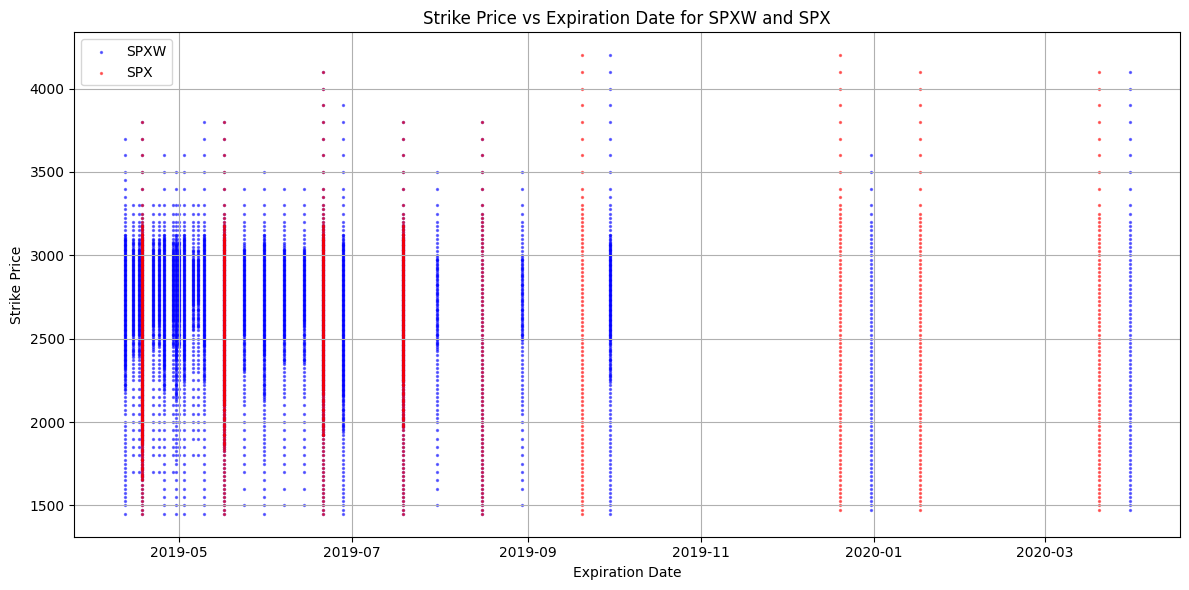

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for sym, color, label in [('SPXW', 'blue', 'SPXW'), ('SPX', 'red', 'SPX')]:
    subset = spx_history_p[spx_history_p['symbol'] == sym]
    plt.scatter(subset['expiration_date'], subset['price_strike'], s=2, alpha=0.5, color=color, label=label)

plt.xlabel('Expiration Date')
plt.ylabel('Strike Price')
plt.title('Strike Price vs Expiration Date for SPXW and SPX')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

### SPX and SPXW have overlapping on fridays, but actually the SPX series is AM settled, so their pricing and IV differ

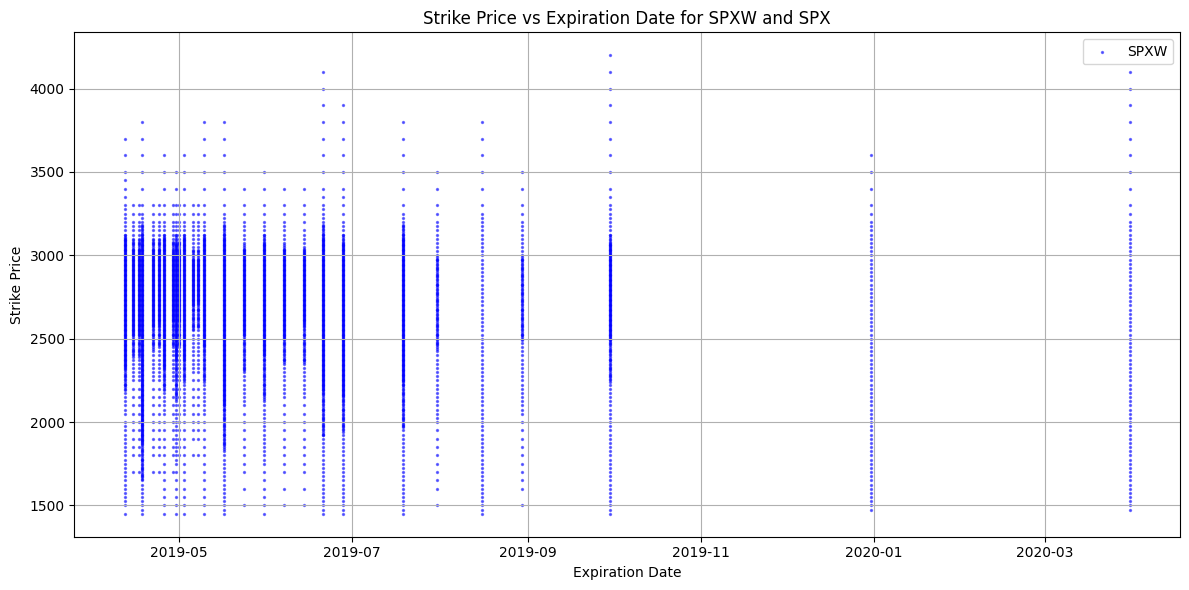

In [26]:

plt.figure(figsize=(12, 6))
for sym, color, label in [('SPXW', 'blue', 'SPXW')]:
    subset = spx_history_p[spx_history_p['symbol'] == sym]
    plt.scatter(subset['expiration_date'], subset['price_strike'], s=2, alpha=0.5, color=color, label=label)

plt.xlabel('Expiration Date')
plt.ylabel('Strike Price')
plt.title('Strike Price vs Expiration Date for SPXW and SPX')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [28]:
spx_history_p[spx_history_p['symbol']=='SPX']['expiration_date'].unique()

<DatetimeArray>
['2019-04-18 00:00:00', '2019-05-17 00:00:00', '2019-06-21 00:00:00',
 '2019-07-19 00:00:00', '2019-08-16 00:00:00', '2019-09-20 00:00:00',
 '2019-12-20 00:00:00', '2020-01-17 00:00:00', '2020-03-20 00:00:00']
Length: 9, dtype: datetime64[ns]

### SPX (S&P 500 Index) options with Tuesday and Thursday expirations began trading in 2022, with the Tuesday-expiring weeklys launching on April 18, 2022, and the Thursday-expiring ones on May 11, 2022

## before 2022 Apr/May, the weekly have 1. Mon, Wed and Fri  2. EOM
## on 2019-04-19, it's holiday "good friday", so the friday one moved to Thursday

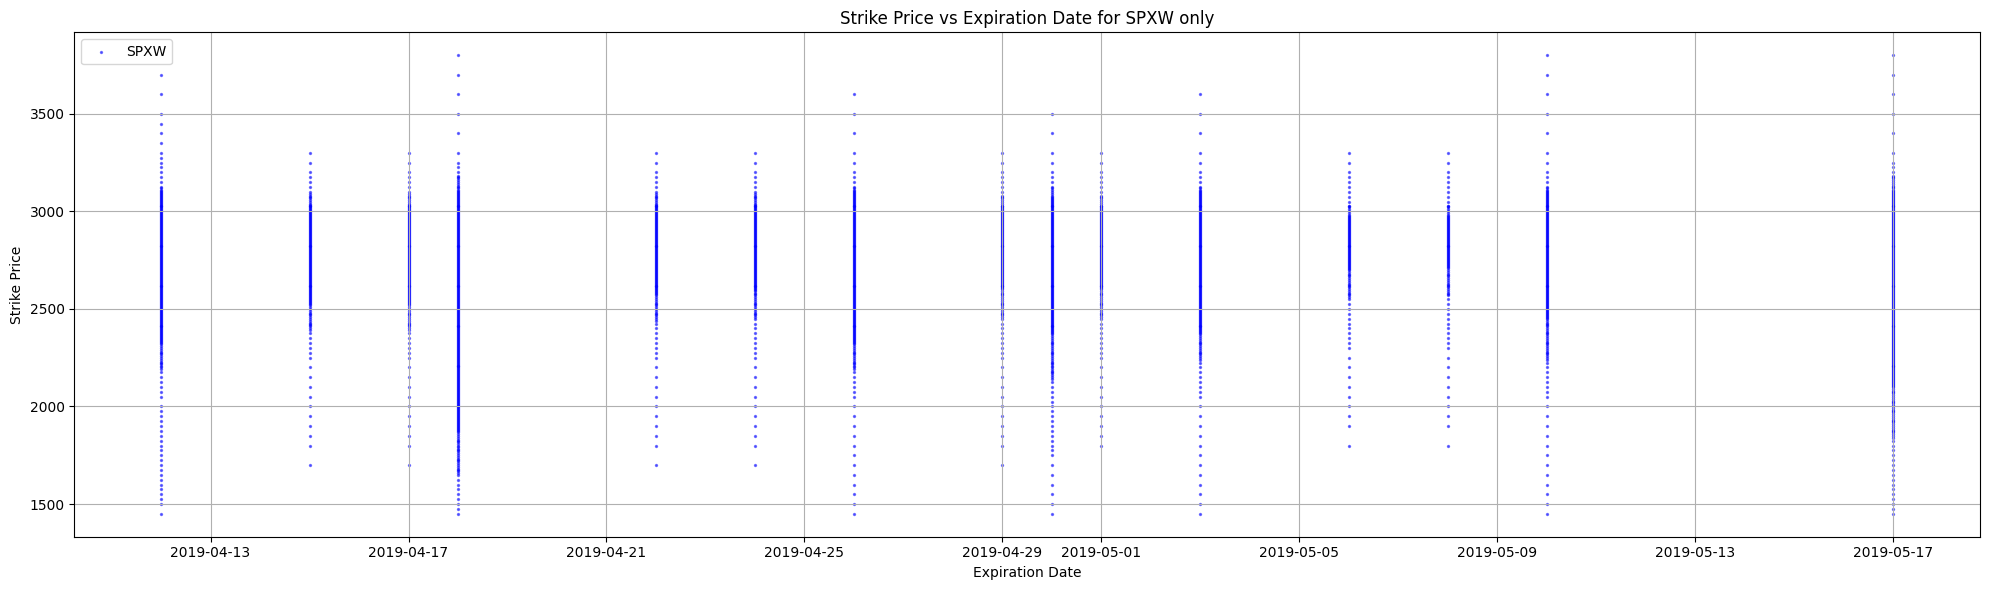

In [33]:
plt.figure(figsize=(20, 6))
for sym, color, label in [('SPXW', 'blue', 'SPXW')]:
    subset = spx_history_p[ (spx_history_p['symbol'] == sym) & (spx_history_p['expiration_date'] < '2019-05-20')]
    plt.scatter(subset['expiration_date'], subset['price_strike'], s=2, alpha=0.5, color=color, label=label)

plt.xlabel('Expiration Date')
plt.ylabel('Strike Price')
plt.title('Strike Price vs Expiration Date for SPXW only')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
spx_history_p[spx_history_p['expiration_date']=='2019-04-18'].head(50)

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement,symbol
515,2019-04-11,SPXW 190418P01450000,7,22192,2019-04-18,P,1450.0,NaN,NaN,NaN,0.0,0,114,0.312663,0.0,-1.0,0.0,-0.0,0.0,-0.0,0.05,0.0,2888.4417,49.80,104006316,0,SPXW
516,2019-04-11,SPX 190418P01450000,7,9327,2019-04-18,P,1450.0,NaN,NaN,NaN,0.0,0,12257,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,49.80,103830460,0,SPX
517,2019-04-11,SPXW 190418P01475000,7,22192,2019-04-18,P,1475.0,NaN,NaN,NaN,0.0,0,68,0.312663,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,48.93,104006318,0,SPXW
518,2019-04-11,SPX 190418P01475000,7,9327,2019-04-18,P,1475.0,NaN,NaN,NaN,0.0,0,2098,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,48.93,103830462,0,SPX
519,2019-04-11,SPX 190418P01500000,7,9327,2019-04-18,P,1500.0,NaN,NaN,NaN,0.0,0,52697,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,48.07,103830464,0,SPX
520,2019-04-11,SPXW 190418P01500000,7,22192,2019-04-18,P,1500.0,NaN,NaN,NaN,0.0,0,3102,0.312663,0.0,-1.0,0.0,-0.0,0.0,-0.0,0.05,0.0,2888.4417,48.07,104006320,0,SPXW
521,2019-04-11,SPXW 190418P01525000,7,22192,2019-04-18,P,1525.0,NaN,NaN,NaN,0.0,0,1200,0.312663,0.0,-1.0,0.0,-0.0,0.0,-0.0,0.05,0.0,2888.4417,47.20,104006322,0,SPXW
522,2019-04-11,SPX 190418P01525000,7,9327,2019-04-18,P,1525.0,NaN,NaN,NaN,0.0,0,9278,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,47.20,103830466,0,SPX
523,2019-04-11,SPX 190418P01550000,7,9327,2019-04-18,P,1550.0,NaN,NaN,NaN,0.0,0,18094,0.314107,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,2888.4417,46.34,103830468,0,SPX
524,2019-04-11,SPXW 190418P01550000,7,22192,2019-04-18,P,1550.0,NaN,NaN,NaN,0.0,0,844,0.312663,0.0,-1.0,0.0,-0.0,0.0,-0.0,0.05,0.0,2888.4417,46.34,104006324,0,SPXW


In [64]:
# spx_history.to_parquet('spx_history_20190411_c_range100.parquet', index=False)
spx_history_p.to_parquet('spx_history_20190411_p_range100.parquet', index=False)

In [56]:
spx_history['stocks_id'].unique()

array([ 9327, 22192])

In [58]:
spx_history['stocks_id'].value_counts()

stocks_id
9327     5040
22192    1155
Name: count, dtype: int64

In [57]:
spx_history[spx_history['stocks_id']==22192].head()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
515,2019-04-11,SPXW 190418C01450000,7,22192,2019-04-18,C,1450.0,NaN,NaN,NaN,1437.7500,0,0,0.29207,1.0,-1.0,0.0,0.0,0.0,0.277535,1443.4,1432.1,2888.4417,-49.80,104006315,0
518,2019-04-11,SPXW 190418C01475000,7,22192,2019-04-18,C,1475.0,NaN,NaN,NaN,1412.8000,0,0,0.29207,1.0,-1.0,0.0,0.0,0.0,0.282320,1418.5,1407.1,2888.4417,-48.93,104006317,0
520,2019-04-11,SPXW 190418C01500000,7,22192,2019-04-18,C,1500.0,NaN,NaN,NaN,1387.8500,0,4,0.29207,1.0,-1.0,0.0,0.0,0.0,0.287105,1393.5,1382.2,2888.4417,-48.07,104006319,0
521,2019-04-11,SPXW 190418C01525000,7,22192,2019-04-18,C,1525.0,NaN,NaN,NaN,1362.6001,0,0,0.29207,1.0,-1.0,0.0,0.0,0.0,0.291890,1368.3,1356.9,2888.4417,-47.20,104006321,0
523,2019-04-11,SPXW 190418C01550000,7,22192,2019-04-18,C,1550.0,NaN,NaN,NaN,1337.8500,0,0,0.29207,1.0,-1.0,0.0,0.0,0.0,0.296675,1343.5,1332.2,2888.4417,-46.34,104006323,0


In [60]:
spx_history['expiration_date'].value_counts()

expiration_date
2019-04-18    602
2019-05-17    536
2019-06-21    520
2019-07-19    494
2019-06-28    249
2019-04-12    217
2019-04-30    204
2019-09-30    203
2019-05-31    202
2019-04-26    202
2019-05-03    194
2019-05-10    190
2019-05-24    160
2019-08-16    158
2019-06-07    157
2019-04-17    149
2019-04-15    149
2019-06-14    147
2019-04-22    141
2019-04-24    139
2019-04-29    136
2019-05-01    135
2019-05-06    109
2019-07-31    107
2019-05-08    107
2019-08-30    102
2019-09-20     85
2019-12-20     84
2020-01-17     81
2020-03-20     81
2020-03-31     80
2019-12-31     75
Name: count, dtype: int64

In [59]:
spx_history[spx_history['expiration_date'] == '2019-04-18']

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
515,2019-04-11,SPXW 190418C01450000,7,22192,2019-04-18,C,1450.0,NaN,NaN,NaN,1437.7500,0,0,0.292070,1.0,-1.0,0.0,0.0,0.0,0.277535,1443.40,1432.1,2888.4417,-49.80,104006315,0
516,2019-04-11,SPX 190418C01450000,7,9327,2019-04-18,C,1450.0,NaN,NaN,NaN,1437.8501,0,0,0.289563,1.0,-1.0,0.0,0.0,0.0,0.266786,1438.90,1436.8,2888.4417,-49.80,103830459,0
517,2019-04-11,SPX 190418C01475000,7,9327,2019-04-18,C,1475.0,NaN,NaN,NaN,1412.6000,0,0,0.289563,1.0,-1.0,0.0,0.0,0.0,0.271385,1413.50,1411.7,2888.4417,-48.93,103830461,0
518,2019-04-11,SPXW 190418C01475000,7,22192,2019-04-18,C,1475.0,NaN,NaN,NaN,1412.8000,0,0,0.292070,1.0,-1.0,0.0,0.0,0.0,0.282320,1418.50,1407.1,2888.4417,-48.93,104006317,0
519,2019-04-11,SPX 190418C01500000,7,9327,2019-04-18,C,1500.0,NaN,NaN,NaN,1387.8501,0,1,0.289563,1.0,-1.0,0.0,0.0,0.0,0.275985,1388.90,1386.8,2888.4417,-48.07,103830463,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2019-04-11,SPXW 190418C03600000,7,22192,2019-04-18,C,3600.0,NaN,NaN,NaN,0.0000,0,0,0.086274,0.0,-1.0,0.0,-0.0,0.0,0.000000,0.05,0.0,2888.4417,24.63,104464367,0
1113,2019-04-11,SPX 190418C03700000,7,9327,2019-04-18,C,3700.0,NaN,NaN,NaN,0.0000,0,0,0.093455,0.0,-1.0,0.0,-0.0,0.0,-0.000000,0.05,0.0,2888.4417,28.10,104572149,0
1114,2019-04-11,SPXW 190418C03700000,7,22192,2019-04-18,C,3700.0,NaN,NaN,NaN,0.0000,0,0,0.086274,0.0,-1.0,0.0,-0.0,0.0,0.000000,0.05,0.0,2888.4417,28.10,104869045,0
1115,2019-04-11,SPX 190418C03800000,7,9327,2019-04-18,C,3800.0,NaN,NaN,NaN,0.0000,0,0,0.093455,0.0,-1.0,0.0,-0.0,0.0,-0.000000,0.05,0.0,2888.4417,31.56,104572151,0


In [38]:
marketData.head()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
0,2021-12-16,SPXW 211217C04205000,1,22192,2021-12-17,C,4205.0,NaN,NaN,NaN,469.95,0,90,1.234846,0.951466,-1.000000,0.000336,-15.274717,0.244834,0.107687,477.3,462.6,4668.75,-9.93,116914375,0
1,2021-12-16,SPX 211217C04205000,1,9327,2021-12-17,C,4205.0,NaN,NaN,NaN,469.75,0,9,1.438931,0.952573,1.438931,0.000332,-20.503288,0.204839,0.078322,473.0,466.5,4668.75,-9.93,116875031,0
2,2021-12-16,SPXW 211217C04210000,1,22192,2021-12-17,C,4210.0,NaN,NaN,NaN,464.95,0,92,1.223811,0.951035,-1.000000,0.000341,-15.245583,0.246570,0.107768,472.3,457.6,4668.75,-9.83,116189567,0
3,2021-12-16,SPX 211217C04210000,1,9327,2021-12-17,C,4210.0,NaN,NaN,NaN,464.80,0,63,1.428150,0.951914,1.428150,0.000338,-20.575583,0.207113,0.078359,468.1,461.5,4668.75,-9.83,116184057,0
4,2021-12-16,SPX 211217C04215000,1,9327,2021-12-17,C,4215.0,NaN,NaN,NaN,459.85,0,81,1.417322,0.951246,1.417322,0.000344,-20.646086,0.209410,0.078395,463.2,456.5,4668.75,-9.72,116875033,0


In [ ]:
marketData.tail()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
2480,2021-12-16,SPXW 220114C06300000,29,9327,2022-01-14,C,6300.0,NaN,NaN,NaN,0.0,0,0,0.146742,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,4668.313,34.95,118096167,0
2481,2021-12-16,SPXW 220114C06400000,29,9327,2022-01-14,C,6400.0,NaN,NaN,NaN,0.0,0,0,0.146742,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,4668.313,37.09,118096169,0
2482,2021-12-16,SPXW 220114C06600000,29,9327,2022-01-14,C,6600.0,NaN,NaN,NaN,0.0,0,0,0.146742,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,4668.313,41.38,118096171,0
2483,2021-12-16,SPXW 220114C06800000,29,9327,2022-01-14,C,6800.0,NaN,NaN,NaN,0.0,0,0,0.146742,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,4668.313,45.66,118096173,0
2484,2021-12-16,SPXW 220114C07000000,29,9327,2022-01-14,C,7000.0,NaN,NaN,NaN,0.0,0,0,0.146742,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,4668.313,49.95,118096175,0


In [44]:
marketData[marketData['option_symbol']=='SPXW  220114C06300000']

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,price,volume,openinterest,iv,delta,preiv,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
2480,2021-12-16,SPXW 220114C06300000,29,9327,2022-01-14,C,6300.0,NaN,NaN,NaN,0.0,0,0,0.146742,0.0,-1.0,0.0,-0.0,0.0,0.0,0.05,0.0,4668.313,34.95,118096167,0


In [27]:
sso_rawiv = ivol.setMethod('/equities/eod/single-stock-option-raw-iv')
df_rawiv = sso_rawiv(
    # optionId=127995165, 
    symbol='TSLA  250919C00250000', from_='2025-07-01', to='2025-07-31')
df_rawiv

HTTPError: 403 Client Error: Forbidden for url: https://restapi.ivolatility.com/equities/eod/single-stock-option-raw-iv?symbol=TSLA++250919C00250000&to=2025-07-31&from=2025-07-01

In [ ]:
getMarketData = ivol.setMethod('/equities/eod/stock-opts-by-param')
# marketData = getMarketData(symbol='12',tradeDate='2021-12-16',dteFrom=0,dteTo=30,deltaFrom=0.5,deltaTo=0.8,cp='C',region='ASIA')
marketData = getMarketData(symbol='AAPL',tradeDate='2021-12-16',dteFrom=0, dteTo=30,moneynessFrom=-10,moneynessTo=100,cp='C')


HTTPError: 403 Client Error: Forbidden for url: https://restapi.ivolatility.com/equities/eod/stock-opts-by-param?symbol=AAPL&tradeDate=2021-12-16&dteFrom=0&dteTo=30&moneynessFrom=-10&moneynessTo=100&cp=C

In [9]:
marketData.head()

,c_date,option_symbol,dte,stocks_id,expiration_date,call_put,price_strike,price_open,price_high,price_low,...,gamma,theta,vega,rho,Ask,Bid,underlying_price,calc_OTM,option_id,is_settlement
0,2021-12-16,AAPL 211217C00157500,1,799,2021-12-17,C,157.5,22.51,23.57,13.60,...,0.008732,-0.318876,0.006725,0.004154,15.35,14.4,172.26,-8.57,118048511,0
1,2021-12-16,AAPL 211217C00160000,1,799,2021-12-17,C,160.0,19.09,21.03,11.00,...,0.012369,-0.354403,0.008439,0.004171,12.80,12.0,172.26,-7.12,115343545,0
2,2021-12-16,AAPL 211217C00162500,1,799,2021-12-17,C,162.5,16.22,18.52,8.76,...,0.015971,-0.289489,0.008665,0.004233,10.15,9.3,172.26,-5.67,118048513,0
3,2021-12-16,AAPL 211217C00165000,1,799,2021-12-17,C,165.0,14.19,16.05,6.35,...,0.029064,-0.458967,0.014722,0.004086,8.00,7.0,172.26,-4.21,115343547,0
4,2021-12-16,AAPL 211217C00167500,1,799,2021-12-17,C,167.5,11.38,13.55,4.25,...,0.049284,-0.517738,0.020363,0.003905,5.40,4.8,172.26,-2.76,118048515,0


In [7]:
getMarketData = ivol.setMethod('/equities/eod/options-rawiv')
aapl_option = getMarketData(symbol='AAPL', date='2025-08-04')
# marketData = getMarketData(symbol='AAPL', from_='2021-12-10', to='2021-12-17')

HTTPError: 403 Client Error: Forbidden for url: https://restapi.ivolatility.com/equities/eod/options-rawiv?symbol=AAPL&date=2025-08-04

In [56]:
marketData

,symbol,exchange,date,Adjusted close,option symbol,expiration,strike,Call/Put,style,ask,bid,price,is_settlement,volume,open interest,Unadjusted
0,TSLA,NASDAQ,2025-07-01,300.71,TSLA 250919C00250000,2025-09-19,250.0,C,A,64.35,63.70,64.025000,0,38,4058,300.71
1,TSLA,NASDAQ,2025-07-02,315.65,TSLA 250919C00250000,2025-09-19,250.0,C,A,76.20,75.75,75.975000,0,60,4078,315.65
2,TSLA,NASDAQ,2025-07-03,315.35,TSLA 250919C00250000,2025-09-19,250.0,C,A,75.35,74.60,74.975000,0,2,4019,315.35
3,TSLA,NASDAQ,2025-07-07,293.94,TSLA 250919C00250000,2025-09-19,250.0,C,A,57.45,57.05,57.250000,0,152,4019,293.94
4,TSLA,NASDAQ,2025-07-08,297.81,TSLA 250919C00250000,2025-09-19,250.0,C,A,60.00,59.65,59.825000,0,29,4032,297.81
5,TSLA,NASDAQ,2025-07-09,295.88,TSLA 250919C00250000,2025-09-19,250.0,C,A,57.45,57.00,57.225000,0,228,4027,295.88
6,TSLA,NASDAQ,2025-07-10,309.87,TSLA 250919C00250000,2025-09-19,250.0,C,A,68.85,68.40,68.625000,0,35,3931,309.87
7,TSLA,NASDAQ,2025-07-11,313.51,TSLA 250919C00250000,2025-09-19,250.0,C,A,71.80,71.45,71.625000,0,28,3936,313.51
8,TSLA,NASDAQ,2025-07-14,316.90,TSLA 250919C00250000,2025-09-19,250.0,C,A,74.65,74.25,74.450000,0,15,3939,316.90
9,TSLA,NASDAQ,2025-07-15,310.78,TSLA 250919C00250000,2025-09-19,250.0,C,A,69.15,68.75,68.950000,0,11,3939,310.78


In [35]:
getOptionsChain = ivol.setMethod('/equities/option-series')
optionsChain = getOptionsChain(symbol='SPX', expFrom='2025-08-23', expTo='2025-12-23', strikeFrom=3000, strikeTo=3010, callPut='C')
print(optionsChain)
#optionsChain.to_csv('optionsChain.csv', header=True) 

getMarketData = ivol.setMethod('/equities/rt/options-rawiv')
marketData = getMarketData(symbols=optionsChain['optionSymbol'])
print(marketData)

             OptionSymbol callPut  strike expirationDate     optionId
0   SPXW  250825C03000000       C  3000.0     2025-08-25  139932825.0
1   SPXW  250826C03000000       C  3000.0     2025-08-26  140037117.0
2   SPXW  250827C03000000       C  3000.0     2025-08-27  140066245.0
3   SPXW  250828C03000000       C  3000.0     2025-08-28  140106107.0
4   SPXW  250829C03000000       C  3000.0     2025-08-29  137496825.0
5   SPXW  250902C03000000       C  3000.0     2025-09-02  140175003.0
6   SPXW  250903C03000000       C  3000.0     2025-09-03  140195623.0
7   SPXW  250904C03000000       C  3000.0     2025-09-04  140209425.0
8   SPXW  250905C03000000       C  3000.0     2025-09-05  139797995.0
9   SPXW  250908C03000000       C  3000.0     2025-09-08  140136999.0
10  SPXW  250909C03000000       C  3000.0     2025-09-09  140267565.0
11  SPXW  250910C03000000       C  3000.0     2025-09-10  140296587.0
12  SPXW  250911C03000000       C  3000.0     2025-09-11  140310361.0
13  SPXW  250912C030

KeyError: 'optionSymbol'

## ES future price

### yfinance do have,  but 'ES=F' shows contract prive with moving maturities

In [70]:
es_data = yf.download('ES=F', start='2019-04-11', end='2020-04-15', interval='1d')
es_data.head()

/tmp/ipykernel_82887/3276766698.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  es_data = yf.download('ES=F', start='2019-04-11', end='2020-04-15', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ES=F,ES=F,ES=F,ES=F,ES=F
Date,,,,,
2019-04-11,2891.75,2900.00,2885.25,2894.75,968649
2019-04-12,2912.50,2914.75,2890.75,2892.00,1227893
2019-04-15,2909.50,2914.50,2900.50,2912.00,955662
2019-04-16,2911.50,2921.25,2904.50,2910.25,1124491
2019-04-17,2900.50,2923.50,2898.50,2910.25,1382265


In [ ]:
# es_data.to_parquet('es_futures_20190411_20200415.parquet', index=True)

In [74]:
future_api_key = '59jFwLv0Y0iv6gUG'
ivol.setLoginParams(apiKey=future_api_key)

In [79]:
getMarketData = ivol.setMethod('/futures/single-futures')
marketData = getMarketData(symbol='ES/22H.CM', from_='2022-01-01', to='2022-03-31')


In [76]:
marketData.head()

,date,symbol,Future symbol,exchange,Future expiration,bid,ask,Open price,High price,Low price,Close price,volume,Open interest
0,2022-01-03,ES,ES/22H.CM,XCME,2022-03-18,4784.50,4784.75,4771.00,4791.25,4747.50,4786.00,1274923,2234550
1,2022-01-04,ES,ES/22H.CM,XCME,2022-03-18,4783.50,4783.75,4785.25,4808.25,4764.50,4784.25,1348261,2237963
2,2022-01-05,ES,ES/22H.CM,XCME,2022-03-18,4692.00,4692.25,4783.50,4788.25,4689.50,4692.50,1777333,2247809
3,2022-01-06,ES,ES/22H.CM,XCME,2022-03-18,4693.50,4693.75,4692.00,4715.75,4662.00,4687.50,1809080,2244390
4,2022-01-07,ES,ES/22H.CM,XCME,2022-03-18,4667.25,4667.50,4695.00,4705.75,4653.75,4667.75,1553298,2248922


In [80]:
### these  currently (2025-09-14) only for PRO users

# getMarketData = ivol.setMethod('/futures/eod/prices')
# marketData = getMarketData(symbol='ES', date='2021-12-16')
# marketData = getMarketData(symbol='ES', from_='2021-12-10', to='2021-12-17')
# marketData.head()


In [83]:
getMarketData = ivol.setMethod('/futures/eod/fut-underlying-info')
marketData = getMarketData(underlyingName='corn', MIC='XCBT')
#OR:
# marketData = getMarketData(symbol='CLA')
#OR:s
# marketData = getMarketData(underlyingName='treasur', region='USA')


In [84]:
marketData.head()

,IVOL_symbol,exch_symbol,BLMB_alias,name,MIC,exchange,region,ccy,contract_size,measure,min_futures_date,max_futures_date,min_option_date,max_option_date,root_list
0,BCF,,CBSA Comdty,Black Sea Corn Financially Settled Platts,XCBT,Chicago Board Of Trade,USA,USD,50.0,METRIC_TONS,2017-12-11,2024-11-04,2019-08-28,2022-05-31,BSO - Standard Options;BSO - Standard Options;
1,BCH,,,Black Sea Corn Financially Settled Platts Half...,XCBT,Chicago Board Of Trade,USA,USD,50.0,METRIC_TONS,2017-12-04,2020-11-30,,,
2,C,ZC,C A Comdty,Corn Futures,XCBT,Chicago Board Of Trade,USA,USD,5000.0,BUSHELS,2005-12-01,2025-09-14,2005-12-02,2025-09-12,C - Standard Options;PY1 - Weekly Friday Optio...
3,CSI,,CSIA Comdty,Soybean_Corn Intercommodity Ratio Options,XCBT,Chicago Board Of Trade,USA,USD,10000.0,INDICES,2010-12-09,2016-06-26,2011-04-13,2014-05-27,CSI;
4,MZC,,,Micro Corn,XCBT,Chicago Board Of Trade,USA,USD,500.0,BUSHELS,2025-02-10,2025-09-14,,,


In [89]:
getMarketData = ivol.setMethod('/futures/eod/futures-info')
marketData = getMarketData(date='2019-04-11',rootSymbol='ES',region='USA')


In [91]:
marketData.shape

(5, 9)

In [90]:
marketData.head()

,Date,FutRootSymbol,FutSymbol,ExpiratioDate,ExchangeCode,MIC,ExchangeName,FutUnderlyingName,Region
0,2019-04-11,ES,ES/19M.CM,2019-06-21,CME,XCME,Chicago Mercantile Exchange,E Mini S and P 500 Index,USA
1,2019-04-11,ES,ES/19U.CM,2019-09-20,CME,XCME,Chicago Mercantile Exchange,E Mini S and P 500 Index,USA
2,2019-04-11,ES,ES/19Z.CM,2019-12-20,CME,XCME,Chicago Mercantile Exchange,E Mini S and P 500 Index,USA
3,2019-04-11,ES,ES/20H.CM,2020-03-20,CME,XCME,Chicago Mercantile Exchange,E Mini S and P 500 Index,USA
4,2019-04-11,ES,ES/20M.CM,2020-06-19,CME,XCME,Chicago Mercantile Exchange,E Mini S and P 500 Index,USA


### there are only 5 future price at most time, much smaller than number of active SPX option maturities